In [1]:
import pandas as pd

df = pd.read_csv('data/kohne_tikili_data.csv')
df

,Unnamed: 0,Item_id,Amount,Currency,Location,Category,Area,Number_of_rooms,Frontage,Mortgage,Condition,Land_area,Current_floor,Total_floors
0,5,5234149,176000,AZN,"['Neapol dairəsi', 'Əhmədli m.', 'Xətai r.', '...",Köhnə tikili,87 m²,3.0,1,1,1,0,8.0,9.0
1,7,5236410,850,AZN,"['ASAN Xidmət №3', 'Yasamal bazarı', 'Elmlər A...",Köhnə tikili,850 m²,1.0,0,0,1,0,3.0,5.0
2,12,5235826,167000,AZN,['Səbail r.'],Köhnə tikili,50 m²,2.0,1,0,1,0,1.0,5.0
3,15,5154779,185000,AZN,"['ASAN Xidmət №3', 'Yasamal bazarı', 'Elmlər A...",Köhnə tikili,75 m²,3.0,1,0,1,0,3.0,5.0
4,19,5234062,700,AZN,"['İnşaatçılar m.', 'Yasamal r.']",Köhnə tikili,85 m²,3.0,0,0,1,0,2.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,9848,5234396,400,AZN,"['İnşaatçılar m.', 'Yasamal r.', 'Yeni Yasamal...",Köhnə tikili,55 m²,2.0,0,0,1,0,5.0,9.0
1418,9852,5235500,128000,AZN,"['Azadlıq Prospekti m.', 'Binəqədi r.']",Köhnə tikili,55 m²,2.0,1,1,1,0,10.0,12.0
1419,9854,5209648,215000,AZN,"['Xətai r.', 'Əhmədli q.']",Köhnə tikili,100 m²,4.0,1,1,1,0,4.0,9.0
1420,9861,5220633,129000,AZN,"['Neftçilər m.', 'Qara Qarayev m.', 'Nizami r....",Köhnə tikili,50 m²,2.0,1,0,1,0,5.0,5.0


In [2]:
to_delete = ["Unnamed: 0", "Item_id", "Category", "Currency", "Land_area"]
data = df.drop(to_delete, axis=1)
data

,Amount,Location,Area,Number_of_rooms,Frontage,Mortgage,Condition,Current_floor,Total_floors
0,176000,"['Neapol dairəsi', 'Əhmədli m.', 'Xətai r.', '...",87 m²,3.0,1,1,1,8.0,9.0
1,850,"['ASAN Xidmət №3', 'Yasamal bazarı', 'Elmlər A...",850 m²,1.0,0,0,1,3.0,5.0
2,167000,['Səbail r.'],50 m²,2.0,1,0,1,1.0,5.0
3,185000,"['ASAN Xidmət №3', 'Yasamal bazarı', 'Elmlər A...",75 m²,3.0,1,0,1,3.0,5.0
4,700,"['İnşaatçılar m.', 'Yasamal r.']",85 m²,3.0,0,0,1,2.0,9.0
...,...,...,...,...,...,...,...,...,...
1417,400,"['İnşaatçılar m.', 'Yasamal r.', 'Yeni Yasamal...",55 m²,2.0,0,0,1,5.0,9.0
1418,128000,"['Azadlıq Prospekti m.', 'Binəqədi r.']",55 m²,2.0,1,1,1,10.0,12.0
1419,215000,"['Xətai r.', 'Əhmədli q.']",100 m²,4.0,1,1,1,4.0,9.0
1420,129000,"['Neftçilər m.', 'Qara Qarayev m.', 'Nizami r....",50 m²,2.0,1,0,1,5.0,5.0


In [3]:
result = "Yes" if data['Area'].str.endswith('m²').all() else "No"
result

'Yes'

In [4]:
data['Area'] = data['Area'].str.replace('m²', '', regex=False).astype(float)

In [5]:
data.isna().any()

Amount             False
Location           False
Area               False
Number_of_rooms    False
Frontage           False
Mortgage           False
Condition          False
Current_floor      False
Total_floors       False
dtype: bool

In [6]:
data.columns

Index(['Amount', 'Location', 'Area', 'Number_of_rooms', 'Frontage', 'Mortgage',
       'Condition', 'Current_floor', 'Total_floors'],
      dtype='object')

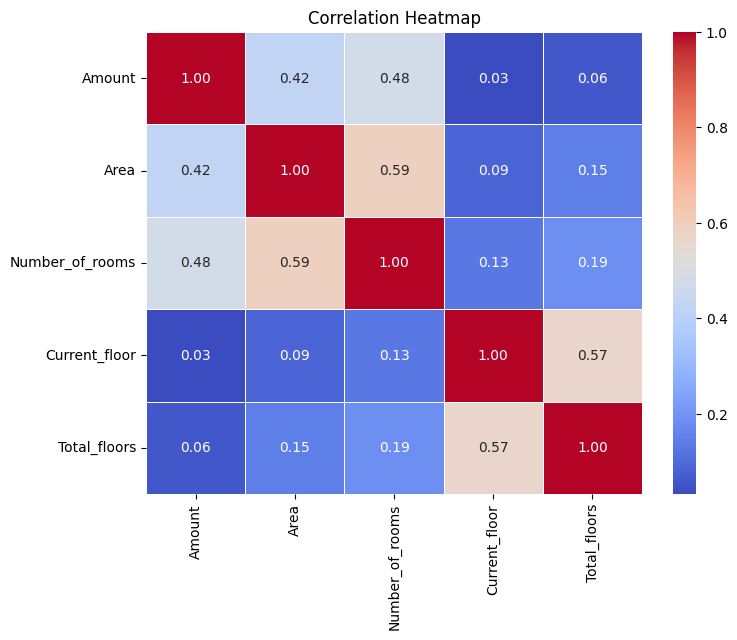

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

to_numeric = ['Amount', 'Area', 'Number_of_rooms','Current_floor', 'Total_floors'] 
numeric_data = data[to_numeric]
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
data = data[(df['Amount'] > 20_000) & (df['Amount'] < 600_000)]

In [9]:
data['Price_per_sqm'] = data['Amount'] / data['Area']

C:\Users\Nariman\AppData\Local\Temp\ipykernel_4848\3397903115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_per_sqm'] = data['Amount'] / data['Area']


In [10]:
data['Location_length'] = data['Location'].str.len()

C:\Users\Nariman\AppData\Local\Temp\ipykernel_4848\3929028353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location_length'] = data['Location'].str.len()


In [11]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data['Location_str'] = data['Location'].str.join(' ').str.lower()
data

C:\Users\Nariman\AppData\Local\Temp\ipykernel_4848\2259878218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location_str'] = data['Location'].str.join(' ').str.lower()


,Amount,Location,Area,Number_of_rooms,Frontage,Mortgage,Condition,Current_floor,Total_floors,Price_per_sqm,Location_length,Location_str
0,176000,"['Neapol dairəsi', 'Əhmədli m.', 'Xətai r.', '...",87.0,3.0,1,1,1,8.0,9.0,2022.988506,58,"[ ' n e a p o l d a i r ə s i ' , ' ə h m ..."
2,167000,['Səbail r.'],50.0,2.0,1,0,1,1.0,5.0,3340.000000,13,[ ' s ə b a i l r . ' ]
3,185000,"['ASAN Xidmət №3', 'Yasamal bazarı', 'Elmlər A...",75.0,3.0,1,0,1,3.0,5.0,2466.666667,75,"[ ' a s a n x i d m ə t № 3 ' , ' y a s ..."
5,102000,"['Sabunçu r.', 'Bakıxanov q.']",34.0,1.0,1,0,0,3.0,5.0,3000.000000,30,"[ ' s a b u n ç u r . ' , ' b a k ı x a n ..."
6,195000,"['İnşaatçılar m.', 'Yasamal r.', 'Yasamal q.']",95.0,3.0,1,0,1,2.0,5.0,2052.631579,46,"[ ' i̇ n ş a a t ç ı l a r m . ' , ' y a s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1416,400000,"['Xalça Muzeyi', 'Fəvvarələr meydanı', 'Sahil ...",130.0,4.0,1,0,1,2.0,5.0,3076.923077,106,"[ ' x a l ç a m u z e y i ' , ' f ə v v a ..."
1418,128000,"['Azadlıq Prospekti m.', 'Binəqədi r.']",55.0,2.0,1,1,1,10.0,12.0,2327.272727,39,[ ' a z a d l ı q p r o s p e k t i m . ' ...
1419,215000,"['Xətai r.', 'Əhmədli q.']",100.0,4.0,1,1,1,4.0,9.0,2150.000000,26,"[ ' x ə t a i r . ' , ' ə h m ə d l i q ..."
1420,129000,"['Neftçilər m.', 'Qara Qarayev m.', 'Nizami r....",50.0,2.0,1,0,1,5.0,5.0,2580.000000,68,"[ ' n e f t ç i l ə r m . ' , ' q a r a ..."


In [12]:
X = data[['Area', 'Number_of_rooms', 'Frontage', 'Mortgage', 'Condition', 'Current_floor', 'Total_floors',"Location_length", 'Location_str']]
y = data['Amount']

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('loc', OneHotEncoder(handle_unknown='ignore'), ['Location_str'])
    ],
    remainder='passthrough'
)

In [14]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42))
])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [16]:
model.fit(X_train, y_train)

c:\Users\Nariman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('loc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location_str'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [17]:
y_pred = model.predict(X_test)

In [18]:
results_df = pd.DataFrame({
    'Actual_Amount': y_test.values,
    'Predicted_Amount': y_pred.round(2)
})

print(results_df.head(10))

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Absolute Error: {mae:,.2f} AZN")
print(f"R² Score: {r2:.4f}")

   Actual_Amount  Predicted_Amount
0         275000     225937.593750
1         123000     115886.812500
2         170000     154170.078125
3         110000     111531.781250
4         107000     130498.343750
5         195000     226979.734375
6         152000     179430.140625
7         145000     149978.828125
8         185000     180005.187500
9         135000     130818.140625

Mean Absolute Error: 20,900.19 AZN
R² Score: 0.7559
